In [1]:
import numpy as np
import math
import itertools
import sys
import matplotlib.pyplot as plt
import copy

from mpl_toolkits import mplot3d
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial import distance_matrix
from scipy.spatial import distance

%load_ext autoreload
%autoreload 2
import cup_quasi_periodic_detection as cqpd

In [2]:
n = 2000

np.random.seed(13)

sphere = cqpd.gen_sphere(600, 1)

theta = np.random.uniform(0,2*np.pi, 200)

x = np.cos(theta) + 2
y = np.sin(theta)
z = np.zeros(200)

x = x.flatten()
y = y.flatten()
z = z.flatten()

circle1 = np.column_stack((x,y,z))

x = np.cos(theta) + np.sqrt(2)
y = np.sin(theta) + np.sqrt(2)
z = np.zeros(200)

x = x.flatten()
y = y.flatten()
z = z.flatten()

circle2 = np.column_stack((x,y,z))

X = np.row_stack((sphere, np.row_stack((circle1, circle2))))

dm_X = distance.cdist(X,X)

# maxmin subsampling
ind_L, cover_r = cqpd.maxmin(dm_X, 80)

dm_L = dm_X[ind_L,:][:,ind_L]

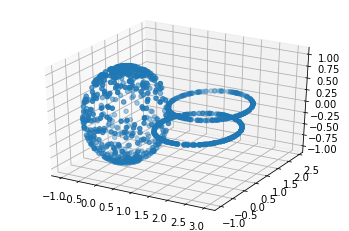

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2])

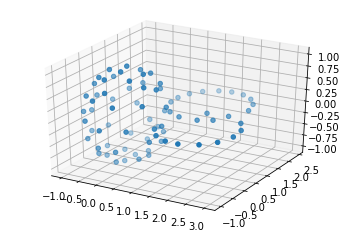

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[ind_L,:][:,0], X[ind_L,:][:,1], X[ind_L,:][:,2])

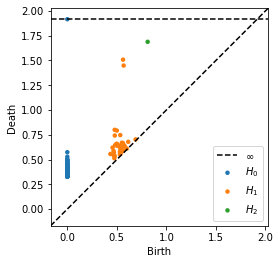

In [5]:
q = 2

result = ripser(dm_L, coeff=q, distance_matrix=True, maxdim=2, do_cocycles=True)

diagrams = result['dgms']
cocycles = result['cocycles']

plot_diagrams(diagrams) 

In [6]:
H_1 = cocycles[1]
H_1_diagram = diagrams[1]
H_1_persistence = H_1_diagram[:,1] - H_1_diagram[:,0]
H_1_persistence_sort_ind = H_1_persistence.argsort()

In [7]:
print(H_1_persistence[H_1_persistence_sort_ind])

[0.01077181 0.01416361 0.0210337  0.02447599 0.02673209 0.02967799
 0.03802386 0.04081357 0.04379773 0.04827869 0.05636641 0.05837053
 0.06164604 0.06372559 0.06719208 0.07457519 0.0750258  0.08128649
 0.08902246 0.09890366 0.10451341 0.10752791 0.11895013 0.12070122
 0.12120765 0.13310868 0.1516189  0.16293097 0.16296124 0.16411951
 0.21168822 0.2632634  0.29226738 0.32184541 0.87985617 0.94518393]


In [8]:
cocycle_1 = H_1[H_1_persistence_sort_ind[-1]]
cocycle_2 = H_1[H_1_persistence_sort_ind[-2]]

In [9]:
cup = cqpd.cup_product_cochains(cocycle_1, cocycle_2, q)
print(cup)

[[61, 53, 21, 1], [53, 32, 21, 1], [53, 32, 1, 1], [53, 42, 21, 1], [53, 21, 4, 1], [53, 21, 10, 1], [53, 10, 1, 1]]


In [10]:
rips_com, orders, diameters = cqpd.rips_complex(dm_L, 1)

In [11]:
d0 = cqpd.delta_0(rips_com['0'], rips_com['1'])
d1 = cqpd.delta_1(rips_com['1'], rips_com['2'])

In [12]:
R1, V1, low = cqpd.matrix_reduction(d1)

In [13]:
cochain = np.zeros(rips_com['2'].shape[0])

cup = np.array(cup)

for i in range(len(cup)):
    simplex = cup[i,2::-1]
    
    j = np.where((rips_com['2'] == simplex).all(axis=1))
    
    cochain[j] = cup[i,3]
    
cochain = cochain[::-1]

In [14]:
y, index = cqpd.backwards_substitution(R1, low, cochain)

In [16]:
print(index)

ind_goal = rips_com['2'][len(rips_com['2'])-index-1]
print(ind_goal)

-1


IndexError: index 994 is out of bounds for axis 0 with size 994

In [ ]:
dm_L[np.ix_(ind_goal[::-1],ind_goal[::-1])]

In [ ]:
diameters['2']